In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *

In [4]:
data_path = 'weather.csv' 
data = pd.read_csv(data_path)

In [5]:
def cari_persentil(data_terurut, persentil):
    index = (len(data_terurut) - 1) * persentil / 100
    if index.is_integer():
        return data_terurut[int(index)]
    else:
        bawah = data_terurut[int(index)]
        atas = data_terurut[int(index) + 1]
        return bawah + (atas - bawah) * (index - int(index))

In [6]:
def statistik_manual(data):
    hasil = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        nilai = data[kolom].dropna()
        data_terurut = sorted(nilai)
        n = len(data_terurut)
        
        mean = sum(data_terurut) / n
        median = cari_persentil(data_terurut, 50)
        modus = max(data_terurut, key=data_terurut.count) if data_terurut else None
        variansi = sum((x - mean) ** 2 for x in data_terurut) / (n - 1)
        standar_deviasi = variansi ** 0.5
        nilai_minimum = data_terurut[0]
        nilai_maksimum = data_terurut[-1]
        range_val = nilai_maksimum - nilai_minimum
        kuartil_1 = cari_persentil(data_terurut, 25)
        kuartil_3 = cari_persentil(data_terurut, 75)
        IQR = kuartil_3 - kuartil_1
        skewness_value = (sum((x - mean) ** 3 for x in data_terurut) / n) / (standar_deviasi ** 3) if standar_deviasi else 0
        kurtosis_value = (sum((x - mean) ** 4 for x in data_terurut) / n) / (standar_deviasi ** 4) - 3 if standar_deviasi else -3
        
        hasil[kolom] = {
            'mean': mean,
            'median': median,
            'modus': modus,
            'std_dev': standar_deviasi,
            'variance': variansi,
            'range': range_val,
            'min': nilai_minimum,
            'max': nilai_maksimum,
            '25%': kuartil_1,
            '75%': kuartil_3,
            'IQR': IQR,
            'skewness': skewness_value,
            'kurtosis': kurtosis_value
        }
    return pd.DataFrame(hasil)

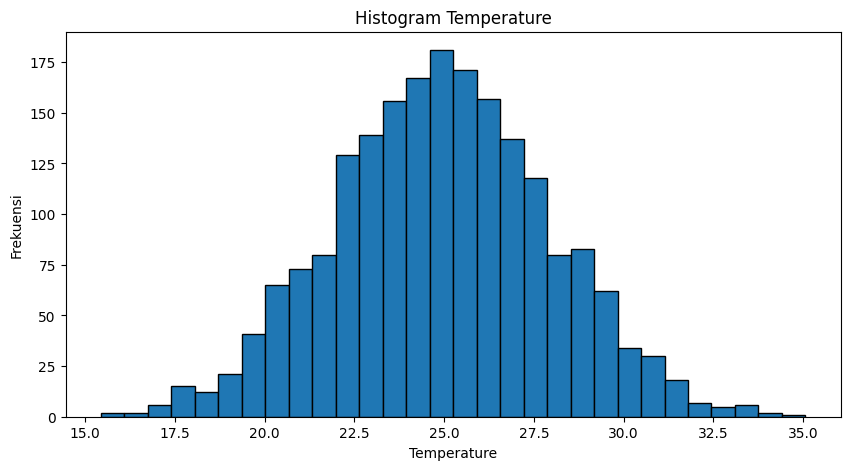


Penjelasan untuk kolom Temperature:
Skewness: 0.029211988479699004
Kurtosis: -0.10097104832320136
Distribusi data mendekati normal.
Distribusi data lebih datar daripada normal (platykurtic).


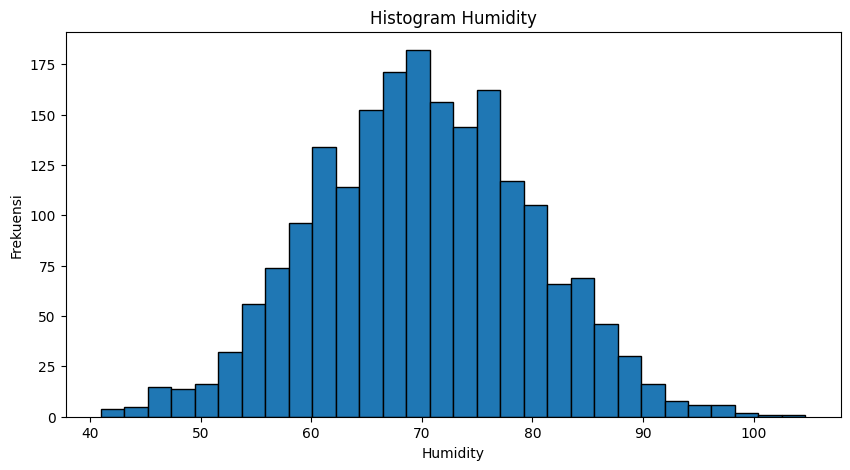


Penjelasan untuk kolom Humidity:
Skewness: 0.029091714485593435
Kurtosis: -0.09495280500831704
Distribusi data mendekati normal.
Distribusi data lebih datar daripada normal (platykurtic).


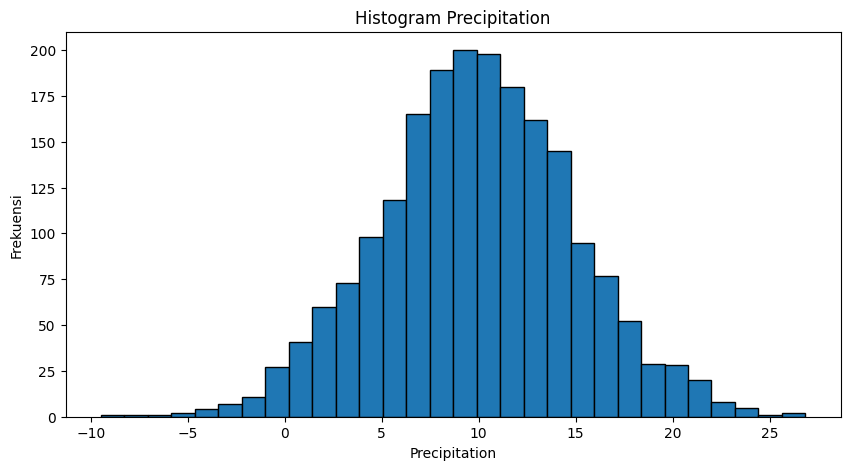


Penjelasan untuk kolom Precipitation:
Skewness: -0.013804119962638237
Kurtosis: 0.11262250043250743
Distribusi data mendekati normal.
Distribusi data lebih tajam daripada normal (leptokurtic).


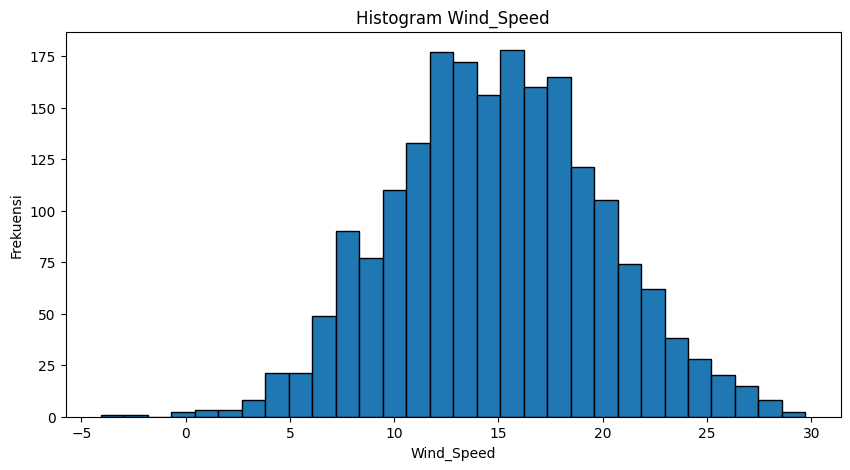


Penjelasan untuk kolom Wind_Speed:
Skewness: 0.035501286147482866
Kurtosis: -0.0961275976052054
Distribusi data mendekati normal.
Distribusi data lebih datar daripada normal (platykurtic).


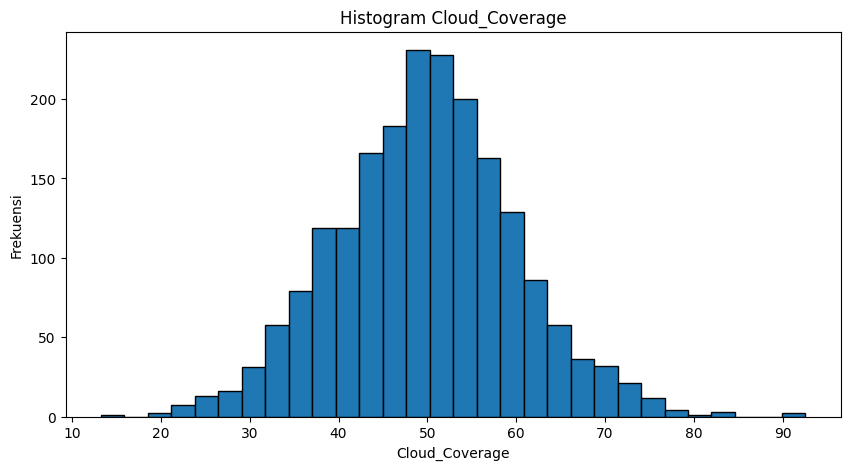


Penjelasan untuk kolom Cloud_Coverage:
Skewness: 0.08549987279502884
Kurtosis: 0.30725512458299686
Distribusi data mendekati normal.
Distribusi data lebih tajam daripada normal (leptokurtic).


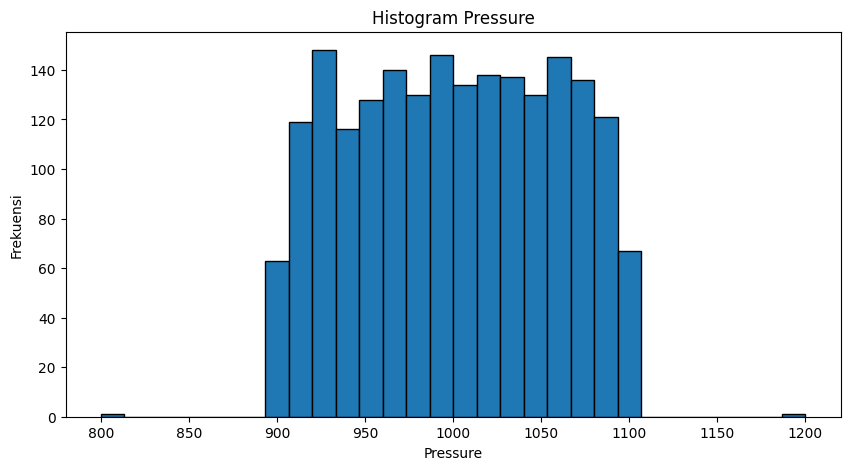


Penjelasan untuk kolom Pressure:
Skewness: -0.025555789337738593
Kurtosis: -1.0658784775217163
Distribusi data mendekati normal.
Distribusi data lebih datar daripada normal (platykurtic).


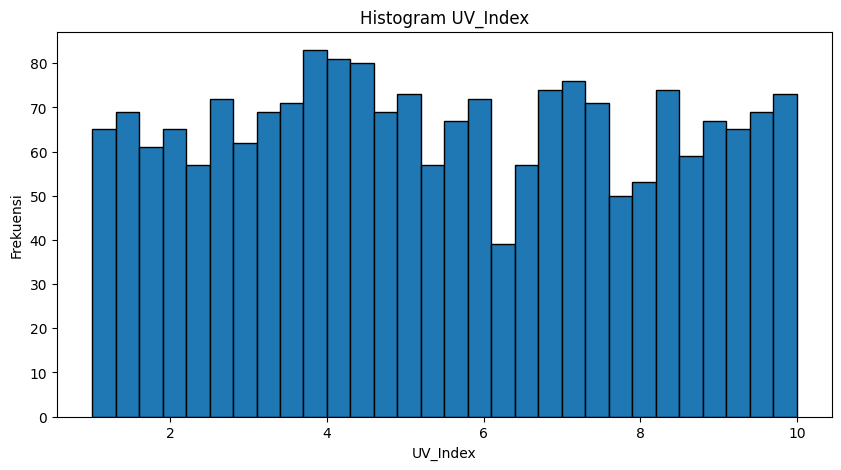


Penjelasan untuk kolom UV_Index:
Skewness: 0.059091179653940715
Kurtosis: -1.1801371332626258
Distribusi data mendekati normal.
Distribusi data lebih datar daripada normal (platykurtic).


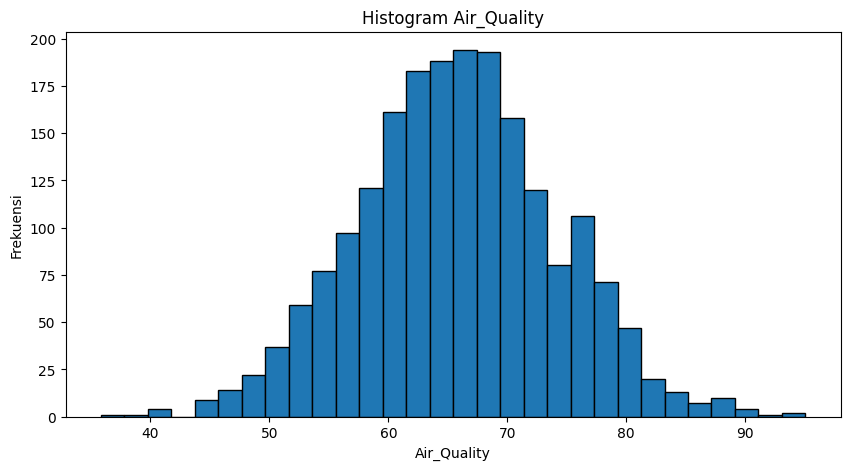


Penjelasan untuk kolom Air_Quality:
Skewness: 0.0493225660944418
Kurtosis: 0.08953280510013073
Distribusi data mendekati normal.
Distribusi data lebih tajam daripada normal (leptokurtic).


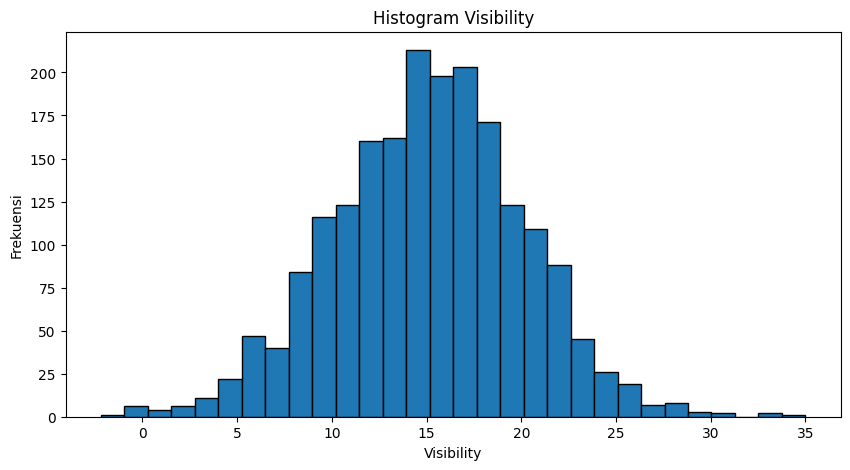


Penjelasan untuk kolom Visibility:
Skewness: -0.05610074849541389
Kurtosis: 0.231618569087765
Distribusi data mendekati normal.
Distribusi data lebih tajam daripada normal (leptokurtic).


In [9]:
def analisis_distribusi(data):
    hasil = statistik_manual(data)
    for kolom in data.select_dtypes(include=['number']).columns:
        if kolom == 'Unnamed: 0':
            continue
        kolom_data = data[kolom].dropna().tolist()
        
        plt.figure(figsize=(10, 5))
        plt.hist(kolom_data, bins=30, edgecolor='black')
        plt.title(f'Histogram {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
        plt.show()
        
        skewness = hasil[kolom]['skewness']
        kurtosis = hasil[kolom]['kurtosis']
        
        print(f"\nPenjelasan untuk kolom {kolom}:")
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")
        
        if abs(skewness) < 0.5:
            print("Distribusi data mendekati normal.")
        elif skewness > 0:
            print("Distribusi data skewed ke kanan (positively skewed).")
        else:
            print("Distribusi data skewed ke kiri (negatively skewed).")
        
        if kurtosis > 0:
            print("Distribusi data lebih tajam daripada normal (leptokurtic).")
        elif kurtosis < 0:
            print("Distribusi data lebih datar daripada normal (platykurtic).")
        else:
            print("Distribusi data memiliki kurtosis normal (mesokurtic).")

analisis_distribusi(data)